In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys

from matplotlib.colors import Normalize
from matplotlib.cm import get_cmap

plt.rcParams.update({'font.size': 12})

In [41]:
def zajci_in_lisice(dt, alpha, beta, L_0=50, Z_0=200):
    rho_z = 5*alpha
    sigma_z = 4*alpha
    rho_l = 4*beta
    sigma_l = 5*beta

    gamma = alpha/L_0
    delta = beta/Z_0

    Ls = np.array([L_0])
    Zs = np.array([Z_0])
    ts = np.array([0.])

    L = L_0
    Z = Z_0
    t = 0.

    while (Z > 0 and L > 0):
        Z = Z + np.random.poisson(rho_z*Z*dt) - np.random.poisson(sigma_z*Z*dt) - np.random.poisson(gamma*Z*L*dt)
        L = L + np.random.poisson(rho_l*L*dt) - np.random.poisson(sigma_l*L*dt) + np.random.poisson(delta*Z*L*dt)
        t = t + dt

        Zs = np.append(Zs, Z)
        Ls = np.append(Ls, L)
        ts = np.append(ts, t)

    return Ls, Zs, ts

In [49]:
# Fazni diagram

dt = 0.001
alpha = 1.
beta = 1.

Ls0, Zs0, ts0 = zajci_in_lisice(dt, alpha, beta)
Ls1, Zs1, ts1 = zajci_in_lisice(dt, alpha, beta)
Ls2, Zs2, ts2 = zajci_in_lisice(dt, alpha, beta)

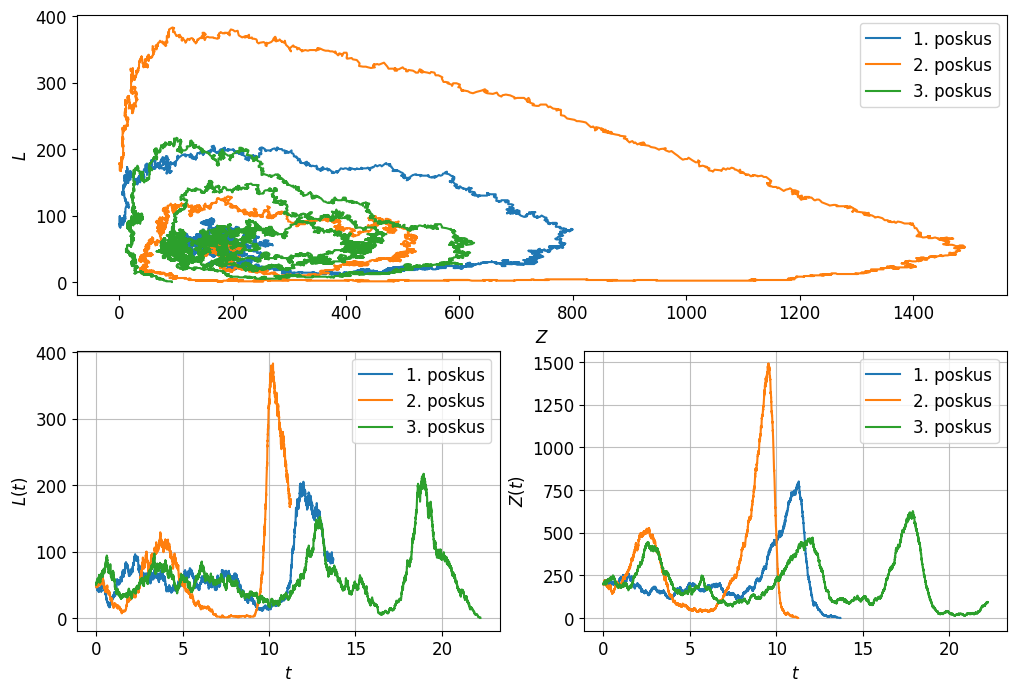

In [52]:
fig = plt.figure(figsize=(12, 8))

ax = fig.add_subplot(2, 2, (1, 2))
ax.set_ylabel(r'$L$')
ax.set_xlabel(r'$Z$')
ax.plot(Zs0, Ls0, label='1. poskus')
ax.plot(Zs1, Ls1, label='2. poskus')
ax.plot(Zs2, Ls2, label='3. poskus')
ax.legend()

ax = fig.add_subplot(2, 2, 3)
ax.set_ylabel(r'$L(t)$')
ax.set_xlabel(r'$t$')
ax.grid(alpha=0.8)
ax.plot(ts0, Ls0, label='1. poskus')
ax.plot(ts1, Ls1, label='2. poskus')
ax.plot(ts2, Ls2, label='3. poskus')
ax.legend()

ax = fig.add_subplot(2, 2, 4)
ax.set_ylabel(r'$Z(t)$')
ax.set_xlabel(r'$t$')
ax.grid(alpha=0.8)
ax.plot(ts0, Zs0, label='1. poskus')
ax.plot(ts1, Zs1, label='2. poskus')
ax.plot(ts2, Zs2, label='3. poskus')
ax.legend()

In [70]:
# Statistika življenskega časa
dt = 0.001
n_iter = 5000

t_deaths = np.zeros(n_iter)
z = 0
l = 0

for i in range(n_iter):
    print(i/n_iter)

    try:
        Ls, Zs, ts = zajci_in_lisice(dt, alpha, beta)
        t_deaths[i] = ts[-1]

        if Zs[-1] == 0:
            z += 1
        else:
            l += 1
    except:
        t_deaths[i] = t_deaths[i-1]
        z+=1
        continue

0.0
0.0002
0.0004
0.0006
0.0008
0.001
0.0012
0.0014
0.0016
0.0018
0.002
0.0022
0.0024
0.0026
0.0028
0.003
0.0032
0.0034
0.0036
0.0038
0.004
0.0042
0.0044
0.0046
0.0048
0.005
0.0052
0.0054
0.0056
0.0058
0.006
0.0062
0.0064
0.0066
0.0068
0.007
0.0072
0.0074
0.0076
0.0078
0.008
0.0082
0.0084
0.0086
0.0088
0.009
0.0092
0.0094
0.0096
0.0098
0.01
0.0102
0.0104
0.0106
0.0108
0.011
0.0112
0.0114
0.0116
0.0118
0.012
0.0122
0.0124
0.0126
0.0128
0.013
0.0132
0.0134
0.0136
0.0138
0.014
0.0142
0.0144
0.0146
0.0148
0.015
0.0152
0.0154
0.0156
0.0158
0.016
0.0162
0.0164
0.0166
0.0168
0.017
0.0172
0.0174
0.0176
0.0178
0.018
0.0182
0.0184
0.0186
0.0188
0.019
0.0192
0.0194
0.0196
0.0198
0.02
0.0202
0.0204
0.0206
0.0208
0.021
0.0212
0.0214
0.0216
0.0218
0.022
0.0222
0.0224
0.0226
0.0228
0.023
0.0232
0.0234
0.0236
0.0238
0.024
0.0242
0.0244
0.0246
0.0248
0.025
0.0252
0.0254
0.0256
0.0258
0.026
0.0262
0.0264
0.0266
0.0268
0.027
0.0272
0.0274
0.0276
0.0278
0.028
0.0282
0.0284
0.0286
0.0288
0.029
0.0292
0.029

Text(50, 50, 'mean    std \n14.17     8.68')

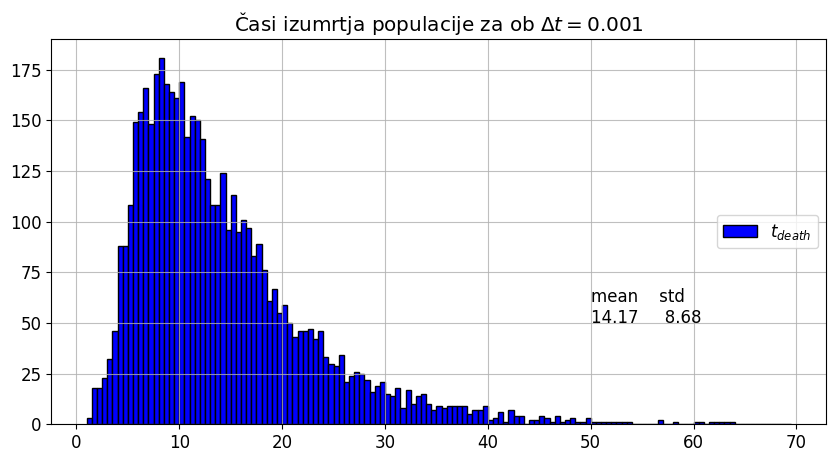

In [75]:
bins = np.arange(1, 70, 0.5)
fig = plt.figure(figsize=(10, 5))

ax = plt.subplot(1, 1, 1)
ax.set_title(r'Časi izumrtja populacije za ob $\Delta t = 0.001$')
ax.grid(alpha=0.8)
ax.hist(t_deaths, bins=bins, alpha=1, color='blue', edgecolor='black', label=r'$t_{death}$')
ax.set_yscale('linear')
ax.legend(loc='right')
ax.text(50, 50, f'mean    std \n'
        + f'{np.mean(t_deaths):.2f}     {np.std(t_deaths):.2f}')

In [74]:
print(z/n_iter)
print(l/n_iter)

0.2276
0.7724
